In [1]:
%pip install unidecode
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import json
from unidecode import unidecode

In [3]:
ufs = ['RS', 'SC', 'PR']

# Primeiro passo

In [4]:
df_2025_ocorrencia = pd.read_csv("../dados/2025/datatran2025.csv", encoding="latin1", sep=";")
df_2025_ocorrencia = df_2025_ocorrencia[df_2025_ocorrencia['uf'].isin(ufs)]
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
6,652573,2025-01-01,quarta-feira,12:23:00,RS,116,376,TAPES,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,1,1,2,"-30,739714","-51,62594",SPRF-RS,DEL02-RS,UOP02-DEL02-RS
7,652617,2025-01-01,quarta-feira,17:45:00,SC,101,"207,4",SAO JOSE,Ausência de reação do condutor,Colisão traseira,...,0,1,0,1,2,"-27,60001226","-48,6226467",SPRF-SC,DEL01-SC,UOP01-DEL01-SC
10,652655,2025-01-01,quarta-feira,20:20:00,SC,101,327,CAPIVARI DE BAIXO,Ingestão de álcool pelo condutor,Colisão com objeto,...,0,2,1,0,3,"-28,42800492","-48,88171497",SPRF-SC,DEL02-SC,UOP01-DEL02-SC


In [5]:
df_2025_ocorrencia.shape

(8336, 30)

In [6]:
df_2025_ocorrencia['latitude'] = df_2025_ocorrencia['latitude'].str.replace(',', '.')
df_2025_ocorrencia['longitude'] = df_2025_ocorrencia['longitude'].str.replace(',', '.')

df_2025_ocorrencia['latitude'] = pd.to_numeric(df_2025_ocorrencia['latitude'], errors='coerce')
df_2025_ocorrencia['longitude'] = pd.to_numeric(df_2025_ocorrencia['longitude'], errors='coerce')
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,-23.182565,-50.637228,SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,-25.365177,-49.042230,SPRF-PR,DEL01-PR,UOP02-DEL01-PR
6,652573,2025-01-01,quarta-feira,12:23:00,RS,116,376,TAPES,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,1,1,2,-30.739714,-51.625940,SPRF-RS,DEL02-RS,UOP02-DEL02-RS
7,652617,2025-01-01,quarta-feira,17:45:00,SC,101,"207,4",SAO JOSE,Ausência de reação do condutor,Colisão traseira,...,0,1,0,1,2,-27.600012,-48.622647,SPRF-SC,DEL01-SC,UOP01-DEL01-SC
10,652655,2025-01-01,quarta-feira,20:20:00,SC,101,327,CAPIVARI DE BAIXO,Ingestão de álcool pelo condutor,Colisão com objeto,...,0,2,1,0,3,-28.428005,-48.881715,SPRF-SC,DEL02-SC,UOP01-DEL02-SC


# Segundo passo

In [7]:
acidentes = gpd.GeoDataFrame(
    df_2025_ocorrencia,
    geometry=gpd.points_from_xy(df_2025_ocorrencia['longitude'], df_2025_ocorrencia['latitude']),
    crs="EPSG:4326"
)

# Terceiro passo

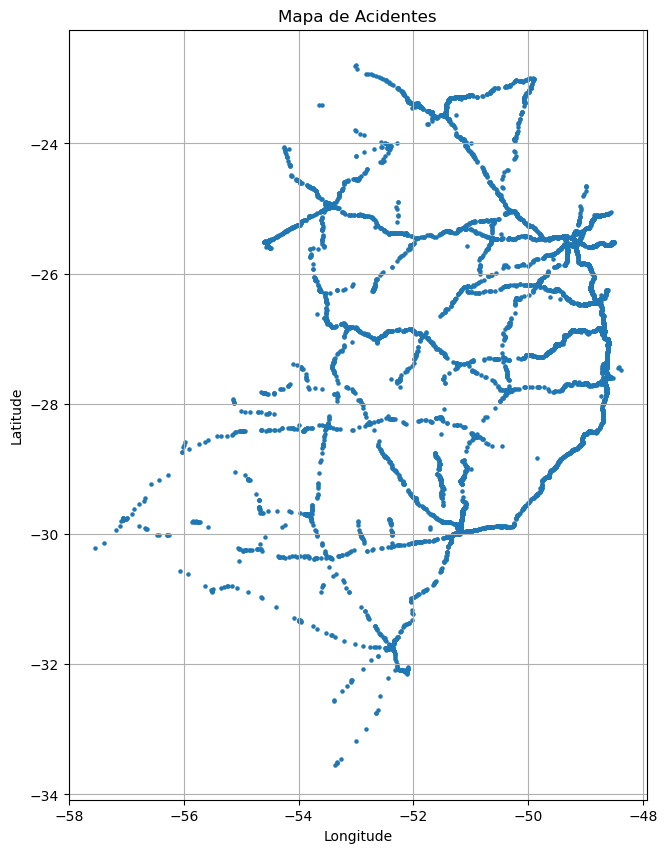

In [8]:
# Assumindo que 'acidentes' já é um GeoDataFrame com geometria definida
acidentes.plot(figsize=(10, 10), markersize=5)

plt.title('Mapa de Acidentes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Terceiro passo (interativo)

In [9]:
# Ponto central do mapa (pode ser a média das coordenadas)
lat_centro = acidentes['latitude'].mean()
lon_centro = acidentes['longitude'].mean()

# Cria o mapa interativo
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=6, tiles='OpenStreetMap')

# Cluster opcional para melhorar visualização
marker_cluster = MarkerCluster().add_to(mapa)

# Adiciona os pontos
for _, row in acidentes.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # equivale ao size=0.2 no R
        color='black',  # cor da borda
        fill=True,
        fill_color='deepskyblue',
        fill_opacity=0.8
    ).add_to(marker_cluster)

# Exibe o mapa
#mapa

# Quarto passo

In [10]:
# Leitura dos shapefiles de cada estado
rs = gpd.read_file("shapefiles/RS_Municipios_2024.shp").to_crs(epsg=4326)
sc = gpd.read_file("shapefiles/SC_Municipios_2024.shp").to_crs(epsg=4326)
pr = gpd.read_file("shapefiles/PR_Municipios_2024.shp").to_crs(epsg=4326)

# Unifica os três GeoDataFrames
cidades_sul = gpd.GeoDataFrame(pd.concat([rs, sc, pr], ignore_index=True), crs="EPSG:4326")

In [11]:
acidentes = acidentes.to_crs(epsg=4326)

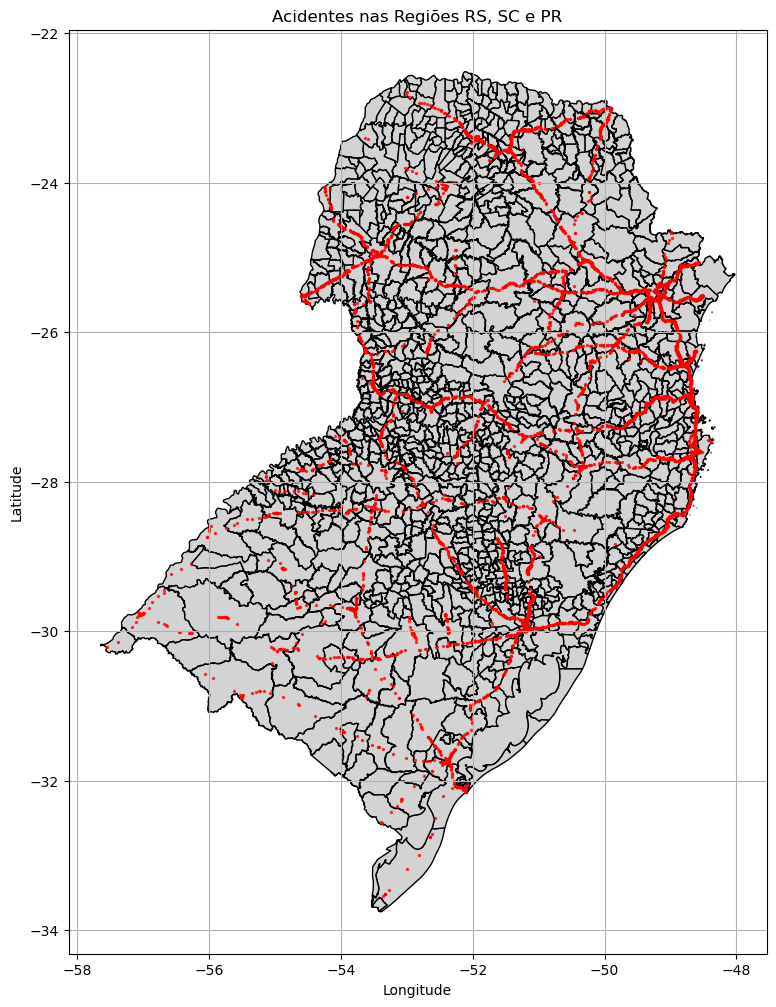

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plotar os polígonos das cidades
cidades_sul.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Plotar os acidentes como pontos
acidentes.plot(ax=ax, color='red', markersize=2, alpha=0.7)

plt.title("Acidentes nas Regiões RS, SC e PR")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# Quarto passo (interativo)

In [31]:
# Garante que os GeoDataFrames estão no mesmo CRS
cidades = cidades_sul.to_crs(epsg=4326)
acidentes = acidentes.to_crs(epsg=4326)

# Centro aproximado do mapa
lat_centro = acidentes['geometry'].y.mean()
lon_centro = acidentes['geometry'].x.mean()

# Cria mapa base
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=6)

# Adiciona as fronteiras dos municípios (cidades)
folium.GeoJson(
    cidades,
    name="Municípios",
    style_function=lambda feature: {
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0
    }
).add_to(mapa)

# Adiciona os pontos de acidentes
for _, row in acidentes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa)

# Exibir o mapa
#mapa

# Quinto passo

In [14]:
cidades = cidades.rename(columns={"NM_MUN": "municipio"})

In [15]:
cidades['municipio'] = cidades['municipio'].apply(lambda x: unidecode(x).upper().strip() if isinstance(x, str) else x)
cidades.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8..."
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4..."
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0..."
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7..."
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8..."


In [16]:
acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,geometry
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,2,0,3,2,-23.182565,-50.637228,SPRF-PR,DEL07-PR,UOP05-DEL07-PR,POINT (-50.63723 -23.18256)
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,4,0,1,2,-25.365177,-49.042230,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,POINT (-49.04223 -25.36518)
6,652573,2025-01-01,quarta-feira,12:23:00,RS,116,376,TAPES,Ausência de reação do condutor,Saída de leito carroçável,...,0,1,1,2,-30.739714,-51.625940,SPRF-RS,DEL02-RS,UOP02-DEL02-RS,POINT (-51.62594 -30.73971)
7,652617,2025-01-01,quarta-feira,17:45:00,SC,101,"207,4",SAO JOSE,Ausência de reação do condutor,Colisão traseira,...,1,0,1,2,-27.600012,-48.622647,SPRF-SC,DEL01-SC,UOP01-DEL01-SC,POINT (-48.62265 -27.60001)
10,652655,2025-01-01,quarta-feira,20:20:00,SC,101,327,CAPIVARI DE BAIXO,Ingestão de álcool pelo condutor,Colisão com objeto,...,2,1,0,3,-28.428005,-48.881715,SPRF-SC,DEL02-SC,UOP01-DEL02-SC,POINT (-48.88171 -28.428)


In [17]:
# Garante o mesmo CRS
cidades = cidades.to_crs(epsg=4326)
acidentes = acidentes.to_crs(epsg=4326)

# Renomeia coluna
cidades = cidades.rename(columns={"NM_MUNICIP": "municipio"})

# Join espacial: acidentes dentro de cada município
cidades_acidentes = gpd.sjoin(cidades, acidentes, how="left", predicate="contains")
cidades_acidentes.head()

,CD_MUN,municipio_left,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,...,0.0,1.0,0.0,2.0,1.0,-28.744619,-56.026439,SPRF-RS,DEL12-RS,UOP01-DEL12-RS


In [18]:

# Conta acidentes por município
# Usar a coluna correta, normalmente 'municipio_left'
cidades_num_acidentes = cidades_acidentes.groupby("municipio_left").size().reset_index(name="num_acidentes")

# Renomear para manter consistência
cidades_num_acidentes = cidades_num_acidentes.rename(columns={"municipio_left": "municipio"})


In [19]:

cidades_com_contagem = cidades.merge(cidades_num_acidentes, on="municipio", how="left")
cidades_com_contagem["num_acidentes"] = cidades_com_contagem["num_acidentes"].fillna(0).astype(int)


In [20]:
cidades.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8..."
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4..."
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0..."
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7..."
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8..."


In [21]:
cidades.shape

(1193, 16)

In [22]:
cidades_com_contagem.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,num_acidentes
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8...",1
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4...",1
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0...",1
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7...",1
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8...",7


In [23]:
cidades_com_contagem.to_csv("cidades_num_acidentes.csv", index=False, encoding="utf-8")

# Sexto passo

In [24]:
# Suponha que você queira renomear a coluna 'antigo_nome' para 'novo_nome'
cidades = cidades.rename(columns={"NM_MUN": "municipio"})


In [25]:
# Remover acentuação de toda a coluna 'municipio'
cidades['municipio'] = cidades['municipio'].apply(lambda x: unidecode(x).upper().strip() if isinstance(x, str) else x)

cidades_num_acidentes['municipio'] = cidades_num_acidentes['municipio'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)


In [26]:
print(cidades["municipio"].unique()[:10])
print(cidades_num_acidentes["municipio"].unique()[:10])


['RONDINHA' 'SANTO ANTONIO DO PALMA' 'SAO PAULO DAS MISSOES'
 'LAJEADO DO BUGRE' 'SAO BORJA' 'GARIBALDI' 'LAJEADO' 'NOVA ALVORADA'
 'ARVOREZINHA' 'SAO DOMINGOS DO SUL']
['ABATIA' 'ABDON BATISTA' 'ABELARDO LUZ' 'ACEGUA' 'ADRIANOPOLIS'
 'AGROLANDIA' 'AGRONOMICA' 'AGUA DOCE' 'AGUA SANTA' 'AGUAS DE CHAPECO']


In [27]:
# cidades: GeoDataFrame com geometria dos municípios
# cidades_num_acidentes: DataFrame com ['municipio', 'num_acidentes']

# Junta os dados ao GeoDataFrame original
cidades_com_contagem = cidades.merge(cidades_num_acidentes, on="municipio", how="left")

# Substitui NaN por 0 (sem acidentes)
cidades_com_contagem["num_acidentes"] = cidades_com_contagem["num_acidentes"].fillna(0)

In [28]:
cidades_com_contagem.head()

,CD_MUN,municipio,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,num_acidentes
0,4316204,RONDINHA,430028,Carazinho,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,252.454,"POLYGON ((-52.91535 -27.88582, -52.91559 -27.8...",1
1,4317558,SANTO ANTONIO DO PALMA,430030,Marau,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,126.094,"POLYGON ((-51.99835 -28.43782, -51.99822 -28.4...",1
2,4319307,SAO PAULO DAS MISSOES,430024,Cerro Largo,4305,Ijuí,43,Rio Grande do Sul,RS,4,Sul,S,None,None,222.504,"POLYGON ((-54.93828 -28.05575, -54.96888 -28.0...",1
3,4311429,LAJEADO DO BUGRE,430034,Palmeira das Missões,4306,Passo Fundo,43,Rio Grande do Sul,RS,4,Sul,S,None,None,67.947,"POLYGON ((-53.15215 -27.69941, -53.15493 -27.7...",1
4,4318002,SAO BORJA,430017,São Borja,4304,Uruguaiana,43,Rio Grande do Sul,RS,4,Sul,S,None,None,3616.674,"POLYGON ((-56.08158 -28.85668, -56.08628 -28.8...",7


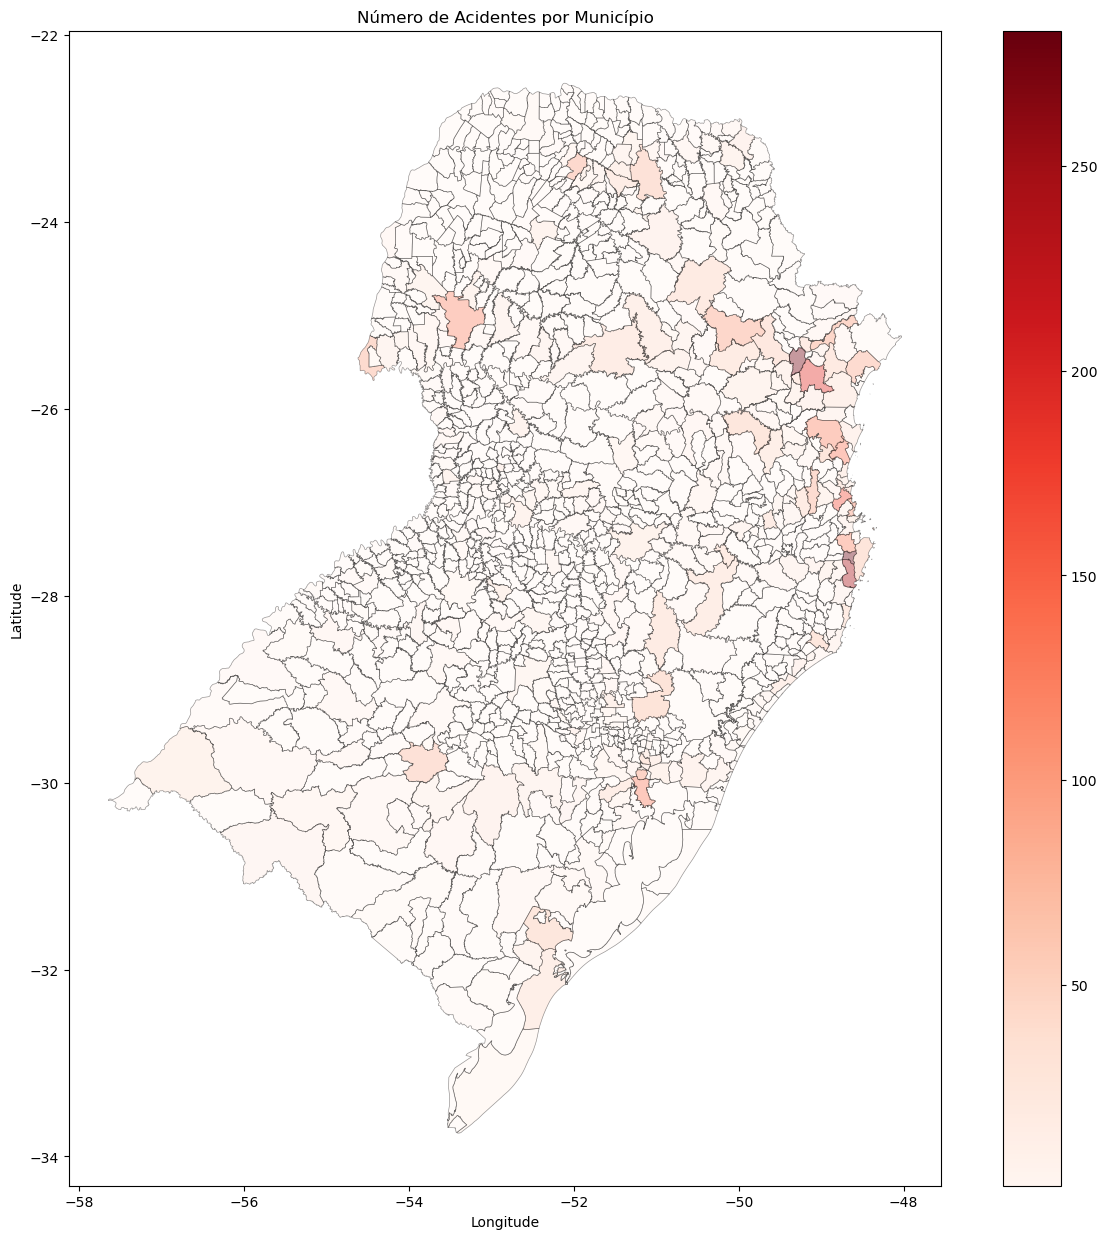

In [29]:
fig, ax = plt.subplots(figsize=(16, 15))

cidades_com_contagem.plot(
    column="num_acidentes",
    cmap="Reds",
    linewidth=0.5,
    edgecolor="black",
    alpha=0.4,
    legend=True,
    ax=ax
)

plt.title("Número de Acidentes por Município")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_3476\3605380134.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


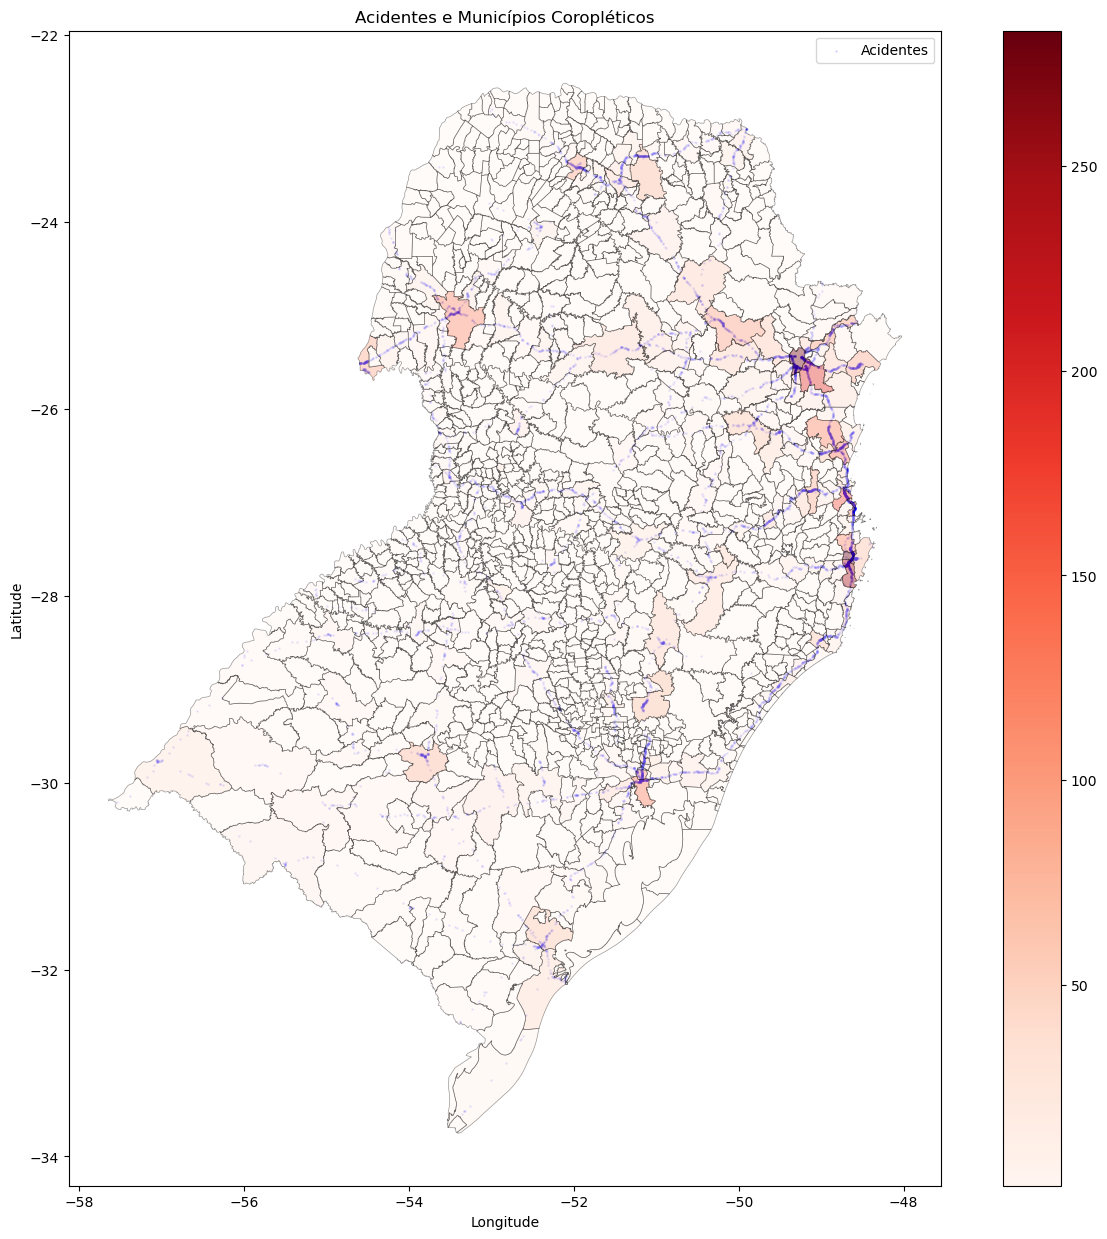

In [30]:
fig, ax = plt.subplots(figsize=(16, 15))

# Plotar pontos dos acidentes com baixa opacidade e tamanho pequeno
acidentes.plot(
    ax=ax,
    markersize=1,       # Ajuste tamanho próximo do 0.01 do R
    alpha=0.1,
    color='blue',
    label='Acidentes'
)

# Plotar municípios com cor conforme contagem de acidentes (variável num_acidentes)
cidades_com_contagem.plot(
    ax=ax,
    column='num_acidentes',  # Ajuste conforme sua variável de contagem
    cmap='Reds',
    alpha=0.4,
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    label='Número de Acidentes'
)

plt.title("Acidentes e Municípios Coropléticos")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()